# Trabalho Aprendizado de Máquina

# Introdução

Esse é o trabalho 1 da disciplina de aprendizado de máquina. Para nosso trabalho buscamos utilizar alguns métodos de aprendizado de máquina supervisionado para uma tarefa de regressão sobre um conjunto de dados de pacientes com câncer. O conjunto de dados tirado do kaggle se chama "global-cancer-patients-2015-2024" e contém, além de diversas informações acerca de pacientes com câncer (como idade, país, tipo de cancer, fatores de risco como obesidade, etc), uma coluna chamada "Target_Severity_Score" (Valor de Severidade Alvo) que indica a severidade do caso daquele paciente, e é isso que tentaremos predizer. Para isso estaremos testando alguns métodos sendo eles Redes Neurais, Máquinas de Vetores de Suporte e Árvores de Decisão.

In [1]:
from Modelo import Modelo
from Dados import Dados

# Dados

Antes de começarmos a testar os modelos podemos usar algumas funções para obter informações acerca de nosso conjunto de dados.

## Informações Principais

Abaixo usaremos o método info() da classe dados para obter algumas das informações principais do conjunto de dados. Primeiramente podemos conferir os nomes de todos os 13 atributos da base de dados e a quantidade de objetos não nulos em cada, como se pode ver não há atributos nulos indicando que a base de dados é completa. Por fim, podemos conferir em cada atributo informações como média dos valores, valor mínimo e valor máximo.

In [2]:
dados = Dados("global_cancer_patients_2015_2024.csv")
dados.info()

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    50000 non-null  int64  
 1   Gender                 50000 non-null  object 
 2   Country_Region         50000 non-null  object 
 3   Year                   50000 non-null  int64  
 4   Genetic_Risk           50000 non-null  float64
 5   Air_Pollution          50000 non-null  float64
 6   Alcohol_Use            50000 non-null  float64
 7   Smoking                50000 non-null  float64
 8   Obesity_Level          50000 non-null  float64
 9   Cancer_Type            50000 non-null  object 
 10  Cancer_Stage           50000 non-null  object 
 11  Treatment_Cost_USD     50000 non-null  float64
 12  Survival_Years         50000 non-null  float64
 13  Target_Severity_Score  50000 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage:

## Distribuição

Com o método distribuicao() podemos visualizar gráficos representando a distribuição dos atributos, ou seja, a quantidade de objetos com determinado valor de atributo ou em determinado intervalo de valores. Esse tipo de informação é importante para sabermos se algum tipo de valor de atributo é mais frequente que outros (!!!). Como podemos observar, com exceção do atributo alvo de "Severidade" que possui uma distribuição normal, os outros possuem uma distribuição em sua maioria constante.

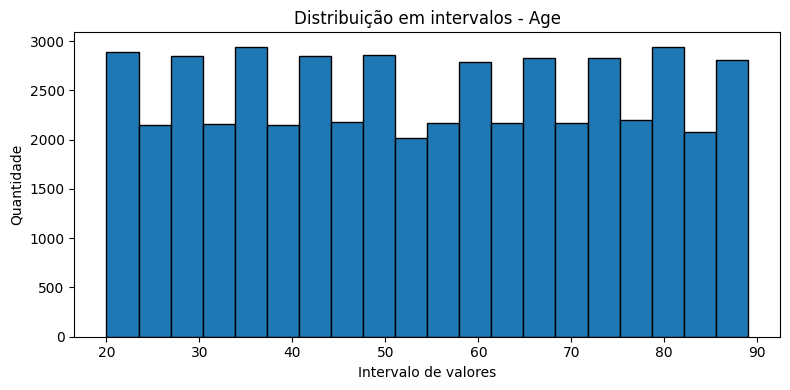

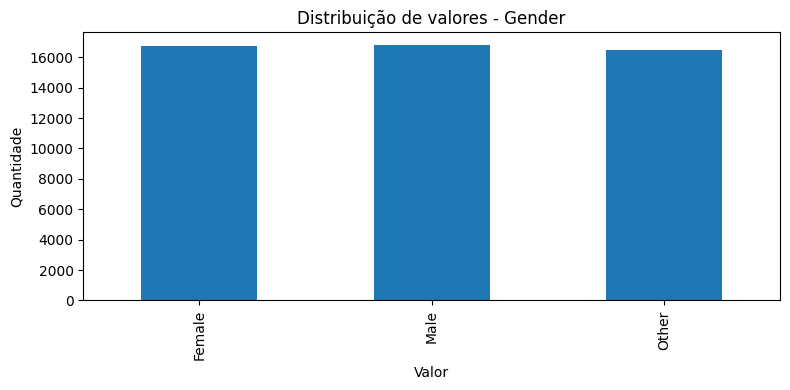

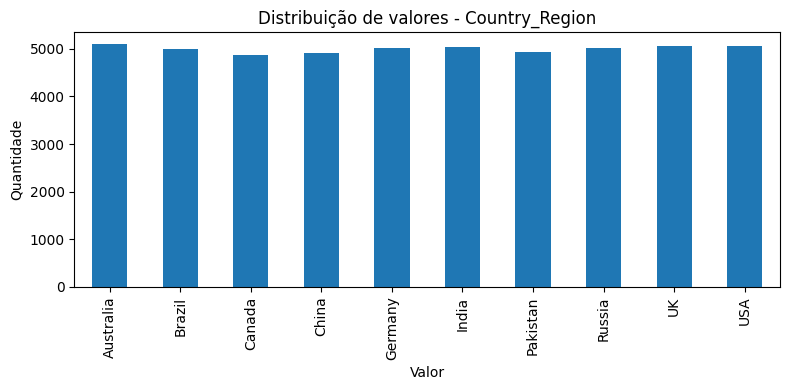

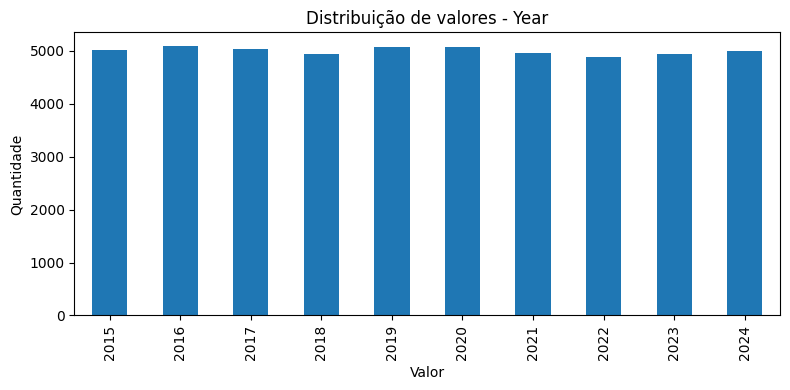

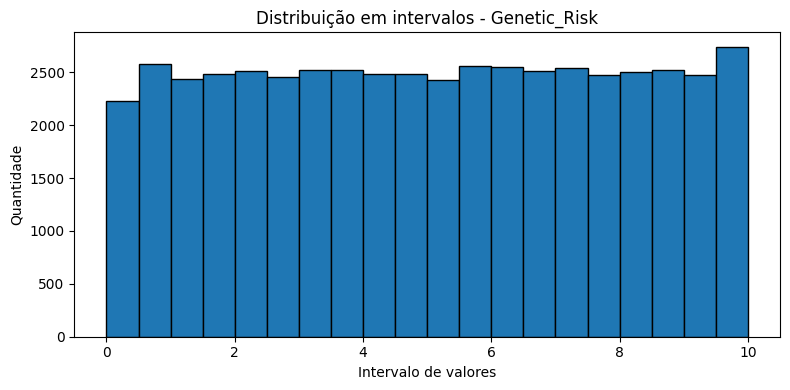

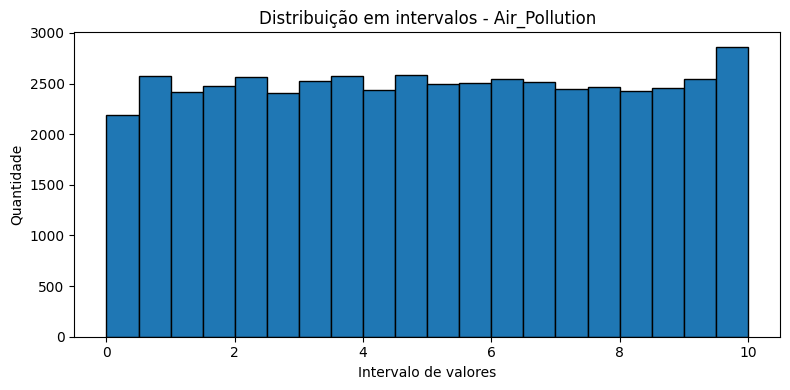

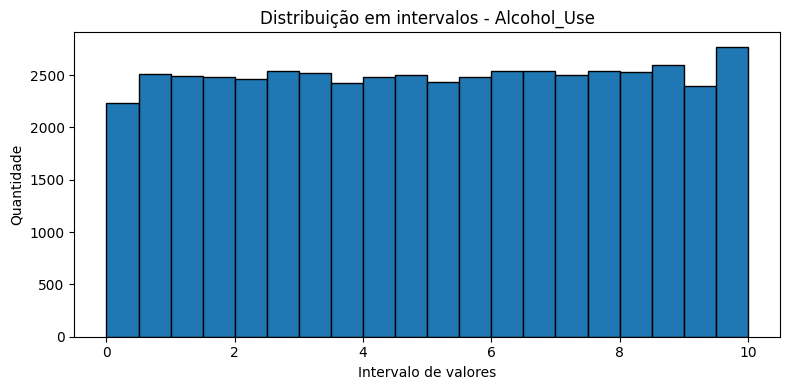

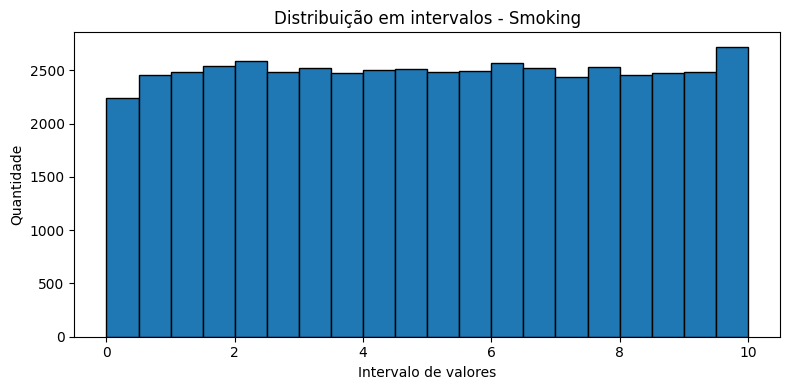

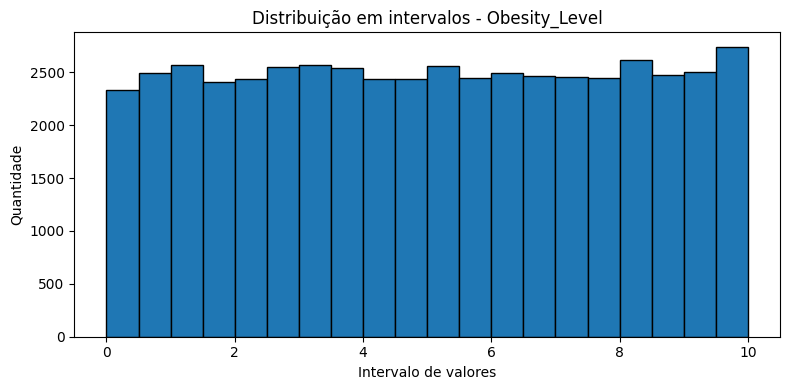

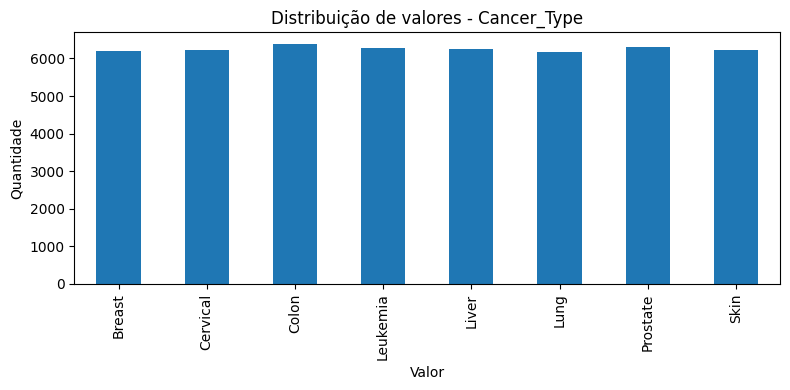

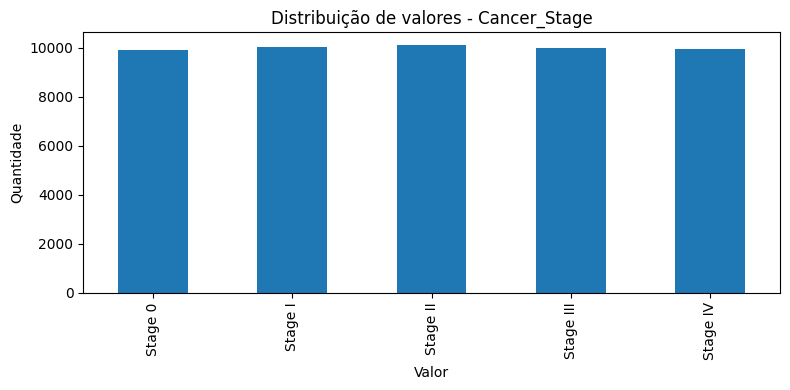

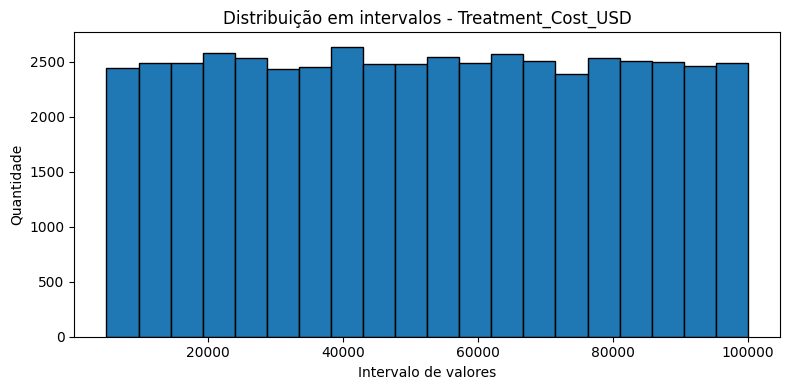

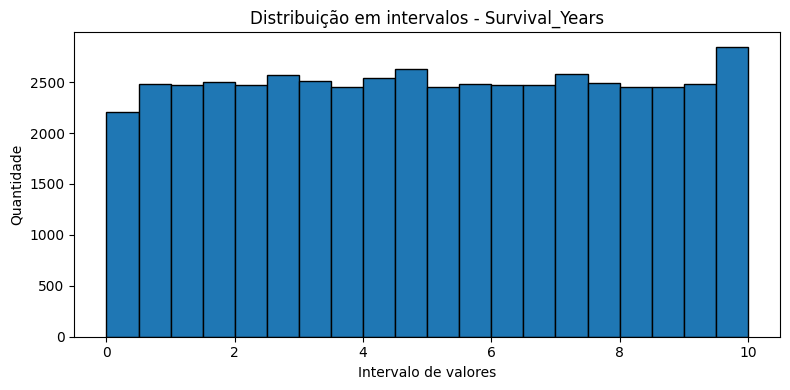

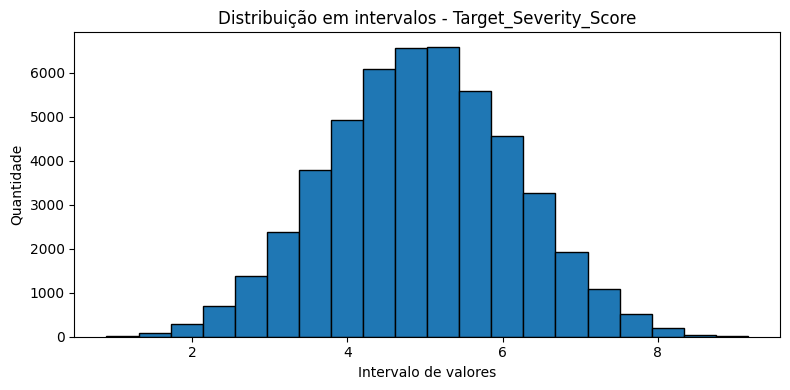

In [3]:
dados.distribuicao()

## Correlações

O método correlacao() é muito importante para conferirmos quais atributos possuem uma influencia direta em outros, oque ajuda a identificar atributos mais importantes e atributos redundantes. É valido ressaltar que não necessariamente um atributo que não é ressaltado é desnecessário. Como podemos ver abaixo percebemos que o atributo alvo de "Severidade" é impactado principalmente pelos valores de fator de risco, sendo eles "Risco Genético", "Poluição do Ar", "Consumo de Bebidas Álcoolicas", "Fumantes" e "Nivel de Obesidade", além do atributo custo de tratamento. Vale ressaltar que a relação dos fatores de risco com o atributo alvo é proporcional, ou seja quando um aumenta o outro também aumenta, enquanto que a relação com o custo de tratamento é inversamente proporcional, quando um aumenta o outro diminui.

                            Age    Gender  Country_Region      Year  \
Age                    1.000000  0.000866        0.008048 -0.002505   
Gender                 0.000866  1.000000        0.003745 -0.003964   
Country_Region         0.008048  0.003745        1.000000  0.002639   
Year                  -0.002505 -0.003964        0.002639  1.000000   
Genetic_Risk           0.002229  0.001788        0.000919  0.009942   
Air_Pollution          0.001101 -0.003600       -0.002643  0.000649   
Alcohol_Use           -0.004130  0.004085        0.004876  0.001934   
Smoking                0.001734  0.001722        0.005443 -0.006209   
Obesity_Level         -0.002706  0.002059        0.001076 -0.002441   
Cancer_Type           -0.001803 -0.005456       -0.000559 -0.000409   
Cancer_Stage          -0.003309 -0.003681        0.000923 -0.011968   
Treatment_Cost_USD     0.003591  0.002705       -0.003682  0.000061   
Survival_Years        -0.000147 -0.002696        0.005121  0.000018   
Target

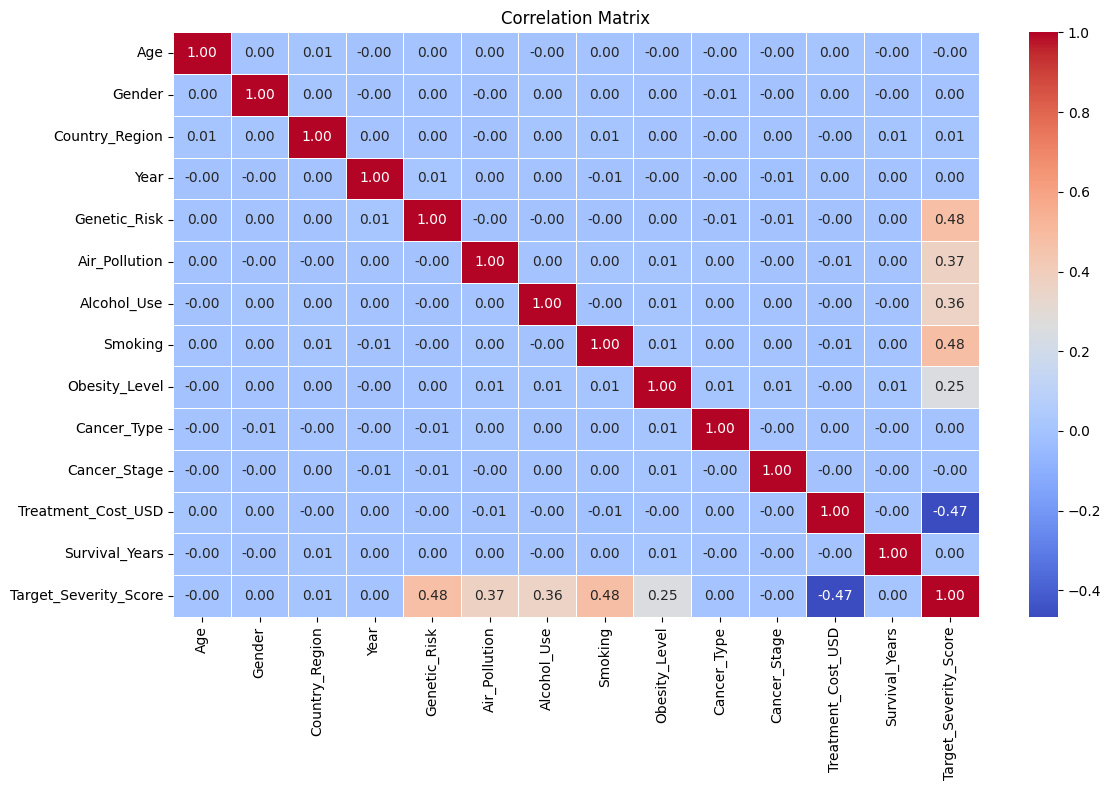

In [5]:
dados.correlacao()

Abaixo nós utilizamos o método correlacao_par(), para testar se caso ao combinar 2 atributos alguma correlaçao antes não visivel é ressaltada. Utilizamos principalmente para checar se ao juntar Cancer_Type (Tipo de Câncer) com Cancer_Stage (Estágio de Câncer) obtiamos algum nível de correlação. Não conseguimos observar essa correlação que talvez seja uma relação mais difícil de perceber ou não exista.

                            Age    Gender  Country_Region      Year  \
Age                    1.000000  0.000866        0.008048 -0.002505   
Gender                 0.000866  1.000000        0.003745 -0.003964   
Country_Region         0.008048  0.003745        1.000000  0.002639   
Year                  -0.002505 -0.003964        0.002639  1.000000   
Genetic_Risk           0.002229  0.001788        0.000919  0.009942   
Air_Pollution          0.001101 -0.003600       -0.002643  0.000649   
Alcohol_Use           -0.004130  0.004085        0.004876  0.001934   
Smoking                0.001734  0.001722        0.005443 -0.006209   
Obesity_Level         -0.002706  0.002059        0.001076 -0.002441   
Cancer_Type           -0.001803 -0.005456       -0.000559 -0.000409   
Cancer_Stage          -0.003309 -0.003681        0.000923 -0.011968   
Treatment_Cost_USD     0.003591  0.002705       -0.003682  0.000061   
Survival_Years        -0.000147 -0.002696        0.005121  0.000018   
Target

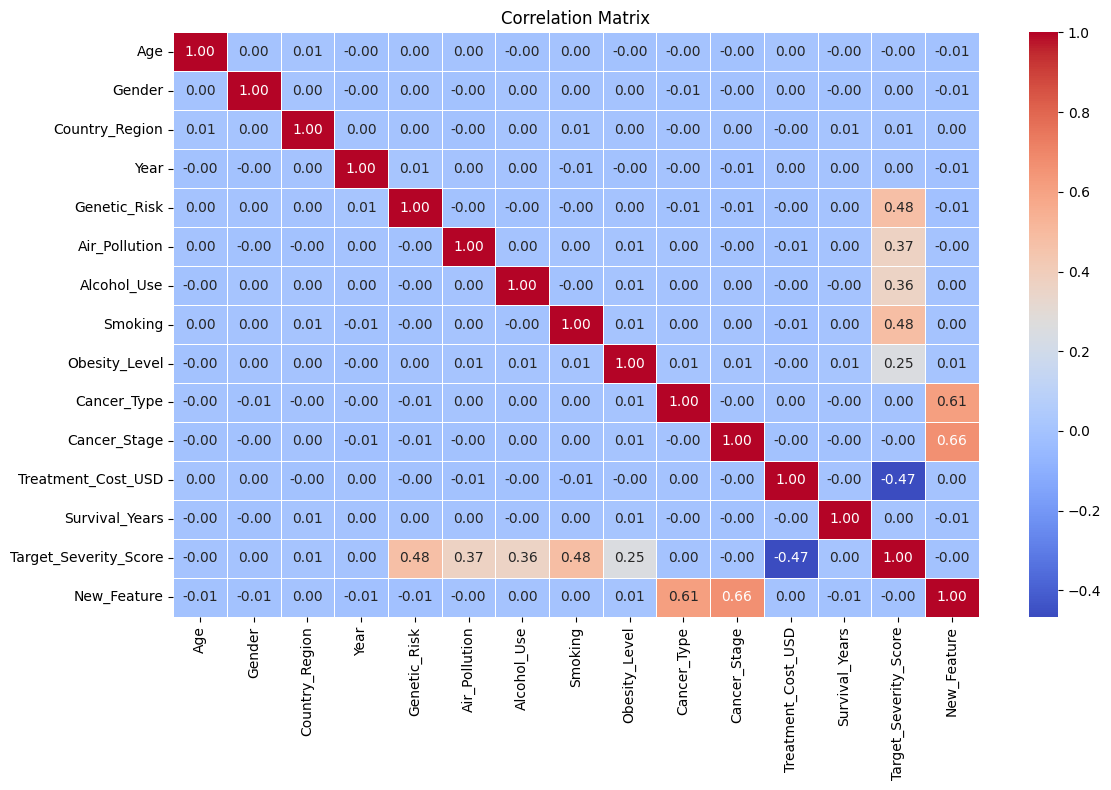

In [6]:
dados.correlacao_par("Cancer_Type", "Cancer_Stage")

# Modelos

Abaixo entraremos nos modelos utilizados e nos resultados obtidos com cada um, além dos hiperparametros e método de codificação de alguns atributos.

## MLP

O MLP (Perceptron Multi-Camadas) é uma das arquiteturas clássicas de redes neurais artificiais e pertence à categoria dos modelos de aprendizado supervisionado. Ele é composto por, no mínimo, três camadas: uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída. Cada neurônio em uma camada é totalmente conectado aos neurônios da camada seguinte, sendo essas conexões ponderadas e ajustadas durante o treinamento por meio de algoritmos como o backpropagation.

O MLP é capaz de modelar relações não lineares complexas e, por isso, é utilizado em uma ampla variedade de tarefas, como:

    Regressão (previsão de valores contínuos),

    Classificação (atribuição de rótulos a dados),

    Reconhecimento de padrões,

    Previsão de séries temporais.

O MLP apresentou ótimos resultados de regressão, com:

    Erro médio muito baixo (MSE ≈ 5e-05)

    Altíssimo poder explicativo (R² ≈ 0.99996)

Por ser um modelo flexível e relativamente simples, é uma boa escolha para problemas em que os dados têm estrutura não linear mas não necessariamente exigem arquiteturas mais complexas como redes convolucionais ou recorrentes.

In [3]:
modelo = Modelo("global_cancer_patients_2015_2024.csv", "MLP")

MSE (por fold): [8.478619332622623e-05, 3.3393965035322185e-05, 3.310373936769877e-05, 5.583980299682333e-05, 4.7423458063910394e-05]
MSE médio: 5.090943175799617e-05
R² (por fold): [0.9999403278662804, 0.9999767875281986, 0.9999769985214931, 0.9999620238484486, 0.9999667403894185]
R² médio: 0.9999645756307679


### Melhor Configuração

Abaixo utilizamos o método check_best_hiperparameter("MLP") para conferir qual configuração entre alguns predeterminados realiza a melhor predição.

A configuração ideal obtida foi:
hidden_layer_sizes=(100, 50), activation='relu', alpha=0.001, learning_rate_init=0.001, max_iter=1000, random_state=42

Esses hiperparâmetros indicam que:

    O problema exige modelagem não linear (por isso, ReLU).

    A arquitetura da rede foi configurada para balancear capacidade de modelagem e simplicidade (100, 50).

    Uma regularização leve foi benéfica para evitar overfitting (alpha = 0.001).

    A taxa de aprendizado padrão foi suficiente para garantir boa convergência e precisão (learning rate = 0.001).

Essas escolhas refletem uma configuração bem ajustada para um problema que provavelmente é moderadamente complexo, mas com bom volume de dados e estrutura clara.

In [8]:
modelo.check_best_hyperparameter("MLP")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END model__activation=relu, model__alpha=0.0001, model__hidden_layer_sizes=(100,), model__learning_rate_init=0.01; total time=   3.6s
[CV] END model__activation=relu, model__alpha=0.0001, model__hidden_layer_sizes=(100,), model__learning_rate_init=0.01; total time=   3.7s
[CV] END model__activation=relu, model__alpha=0.0001, model__hidden_layer_sizes=(100,), model__learning_rate_init=0.01; total time=   4.1s
[CV] END model__activation=relu, model__alpha=0.0001, model__hidden_layer_sizes=(100,), model__learning_rate_init=0.01; total time=   4.4s
[CV] END model__activation=relu, model__alpha=0.0001, model__hidden_layer_sizes=(100,), model__learning_rate_init=0.01; total time=   4.5s
[CV] END model__activation=relu, model__alpha=0.0001, model__hidden_layer_sizes=(100, 50), model__learning_rate_init=0.01; total time=   6.3s
[CV] END model__activation=relu, model__alpha=0.0001, model__hidden_layer_sizes=(100,), model__learni

### Testando Encoding de Atributos x Mapeamento Trivial

Utilizamos a classe OneHotEncoder do scikit-learn para codificar alguns atributos que não tinham relação de ordem e a OrdinalEncoder para atributos com relação de ordem, para verificar se obtinhamos uma melhor performance, oque não foi verificado. A diminuição de desempenho pode ser relacionada ao fato da codificação OneHot levar a significante aumento de dimensionalidade do conjunto de dados.

In [ ]:
modelo = Modelo("global_cancer_patients_2015_2024.csv", "MLP", encoding=True)

/home/lucas_of/anaconda3/envs/NLP/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MSE (por fold): [0.0003690677447133881, 0.00044575811425431004, 0.00039185570237987386, 0.0005822167462684057, 0.000437771957690769]
MSE médio: 0.00044533405306134934
R² (por fold): [0.999740251815182, 0.9996901491737683, 0.999727726816117, 0.999604039588153, 0.9996929763152933]
R² médio: 0.9996910287417027


## SVR

O SVR (Support Vector Regressor) é a versão para regressão do modelo de Máquinas de Vetores de Suporte (SVM - Support Vector Machine). Ao invés de buscar uma fronteira entre classes (como no SVM de classificação), o SVR procura ajustar uma função que se mantenha o mais próxima possível dos dados de treinamento, mas com tolerância a pequenos desvios definidos por um parâmetro ε (epsilon).

A ideia central é:

    Encontrar uma função (geralmente não linear) que tenha erro máximo ε em relação às amostras de treino.

    Penalizar apenas os pontos que ultrapassam esse limite (chamados de vetores de suporte).

O SVR apresentou ótimos resultados de regressão, com:

    Erro médio muito baixo (MSE ≈ 1e-05)

    Altíssimo poder explicativo (R² ≈ 0.99999)

Isso mostra que o SVR foi capaz de ajustar bem os dados com alta precisão, mantendo consistência em todas as divisões de validação cruzada. Apesar de, em muitos casos, redes neurais como o MLP serem mais flexíveis, o SVR demonstrou ser altamente eficaz neste problema específico, provavelmente por conta de dados bem distribuídos e dimensionalidade adequada.

In [2]:
modelo = Modelo("global_cancer_patients_2015_2024.csv", "SVR")

MSE (por fold): [1.2903980666610526e-05, 1.3188102601695514e-05, 1.2783503821888451e-05, 1.3343428533682878e-05, 1.2963766286301886e-05]
MSE médio: 1.303655638203585e-05
R² (por fold): [0.9999909182376323, 0.9999908328208575, 0.9999911176352274, 0.9999909252533674, 0.9999909080898788]
R² médio: 0.9999909404073929


### Melhor Configuração

Esses hiperparâmetros revelam que o SVR foi configurado para ser:

    Simples e generalizável (C = 0.1, kernel = 'linear');

    Preciso, mas com controle de ruído (epsilon = 0.01);

    Automático e adaptado ao conjunto de dados (gamma = 'scale').

Essa configuração é ideal para problemas com estrutura linear, dados de boa qualidade e demanda por previsões precisas, sem a complexidade ou custo computacional de kernels não lineares.

In [4]:
modelo.check_best_hyperparameter("SVR")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END model__C=0.1, model__epsilon=0.01, model__gamma=auto, model__kernel=linear; total time=   2.1s
[CV] END model__C=0.1, model__epsilon=0.01, model__gamma=scale, model__kernel=linear; total time=   2.1s
[CV] END model__C=0.1, model__epsilon=0.01, model__gamma=scale, model__kernel=linear; total time=   2.1s
[CV] END model__C=0.1, model__epsilon=0.01, model__gamma=scale, model__kernel=linear; total time=   2.1s
[CV] END model__C=0.1, model__epsilon=0.01, model__gamma=scale, model__kernel=linear; total time=   2.3s
[CV] END model__C=0.1, model__epsilon=0.01, model__gamma=scale, model__kernel=linear; total time=   2.4s
[CV] END model__C=0.1, model__epsilon=0.01, model__gamma=auto, model__kernel=linear; total time=   2.2s
[CV] END model__C=0.1, model__epsilon=0.01, model__gamma=auto, model__kernel=linear; total time=   2.2s
[CV] END model__C=0.1, model__epsilon=0.01, model__gamma=auto, model__kernel=linear; total time=   2.

### Testando Encoding de Atributos x Mapeamento Trivial

Utilizamos a classe OneHotEncoder do scikit-learn para codificar alguns atributos que não tinham relação de ordem e a OrdinalEncoder para atributos com relação de ordem, para verificar se obtinhamos uma melhor performance, oque não foi verificado. A diminuição de desempenho pode ser relacionada ao fato da codificação OneHot levar a significante aumento de dimensionalidade do conjunto de dados.

In [4]:
modelo = Modelo("global_cancer_patients_2015_2024.csv", "SVR", encoding=True)

MSE (por fold): [1.3285712367824242e-05, 1.3439383849511532e-05, 1.3412577704248005e-05, 1.3255798457002472e-05, 1.3144004751867919e-05]
MSE médio: 1.3307495426090834e-05
R² (por fold): [0.999990649576613, 0.9999906581528039, 0.9999906805356833, 0.9999909848498003, 0.9999907816827921]
R² médio: 0.9999907509595385


## DTR

O Decision Tree Regressor (Árvore de Decisão para Regressão) é um método de aprendizado supervisionado que divide os dados em regiões menores baseando-se em decisões sequenciais. A cada divisão (ou "nó"), o algoritmo escolhe a variável e o ponto de corte que minimizam o erro de predição nos subconjuntos resultantes.

A árvore constrói essas divisões de forma hierárquica, criando um modelo interpretável que toma decisões semelhantes a um conjunto de regras "se-então".

Embora o Decision Tree Regressor apresente uma performance razoável (com R² > 0.91), seus resultados são visivelmente inferiores aos de modelos mais sofisticados como MLP e SVR:

    MSE elevado indica maiores erros de predição.

    R² menor sugere capacidade reduzida de modelar padrões complexos.

Esse desempenho pode ser adequado em cenários onde:

    A interpretação do modelo é prioridade.

    Os dados são mais simples ou menos sensíveis a erros.

In [2]:
modelo = Modelo("global_cancer_patients_2015_2024.csv", "DTR")

MSE (por fold): [0.1183331265335034, 0.11540531784518139, 0.11589657447397961, 0.12174115422834465, 0.11734495161927438]
MSE médio: 0.1177442249400567
R² (por fold): [0.9167176886596176, 0.9197806345136779, 0.9194715576639241, 0.917204927759404, 0.9177021762245331]
R² médio: 0.9181753969642313


### Melhor Configuração

Esses hiperparâmetros indicam uma árvore com:

    Alta flexibilidade (max_depth = None);

    Critério de divisão eficiente e menos propenso a overfitting (friedman_mse);

    Controle de generalização (min_samples_leaf = 4).

Apesar desses ajustes, os resultados do modelo mostram que a árvore ainda não alcançou a precisão de modelos como SVR e MLP, o que é esperado para árvores isoladas.

In [6]:
modelo.check_best_hyperparameter("DTR")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END model__criterion=squared_error, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.1s
[CV] END model__criterion=squared_error, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=5; total time=   0.1s
[CV] END model__criterion=squared_error, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=10; total time=   0.1s
[CV] END model__criterion=squared_error, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=10; total time=   0.1s
[CV] END model__criterion=squared_error, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.1s
[CV] END model__criterion=squared_error, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.1s
[CV] END model__criterion=squared_error, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=10; total tim

### Testando Encoding de Atributos x Mapeamento Trivial

Para árvores de decisão encoding não é necessário, então foi apenas feito o mapeamento padrão de valores diferentes e finitos para inteiros diferentes.

# Conclusões

Neste projeto, foram avaliados diferentes modelos de aprendizado de máquina para resolver um problema de regressão, incluindo MLP (Multi-Layer Perceptron), Decision Tree Regressor e SVR (Support Vector Regressor). Após a realização de experimentos com validação cruzada e ajuste de hiperparâmetros, o modelo que apresentou melhor desempenho foi o SVR, alcançando um R² de 0.999991, o que indica altíssima capacidade preditiva.

A melhor configuração obtida para o SVR foi:

{'model__C': 0.1, 'model__epsilon': 0.01, 'model__gamma': 'scale', 'model__kernel': 'linear'}

Essa configuração revela que:

    O problema apresenta uma relação aproximadamente linear, justificando o uso do kernel linear.

    Um valor pequeno de C e epsilon permitiu controle sobre o ajuste, promovendo regularização e alta precisão, sem sobreajustar os dados.

    O uso de gamma='scale' garantiu uma adaptação adequada à variabilidade dos dados.

Em comparação com os outros modelos testados, o SVR se destacou por sua simplicidade, robustez e excelente generalização, mostrando-se a escolha mais eficaz para esse problema específico de regressão.

Dessa forma, conclui-se que o SVR, com kernel linear e parâmetros bem ajustados, é a melhor alternativa entre os modelos considerados, oferecendo resultados altamente precisos e estáveis.